# web scraping the data  

In [1]:
import requests
import pandas as pd

url = 'https://companiesmarketcap.com/'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

dfs = pd.read_html(r.text)

# scale down to 50 companies

In [77]:
df = dfs[0][:50]
df

,Rank,Name,Market Cap,Price,Today,Price (30 days),Country
0,1,Saudi Aramco 2222.SR,$2.332 T,$10.60,2.33%,NaN,🇸🇦 S. Arabia
1,2,Apple AAPL,$2.223 T,$137.35,2.46%,NaN,🇺🇸 USA
2,3,Microsoft MSFT,$1.893 T,$253.14,0.37%,NaN,🇺🇸 USA
3,4,Alphabet (Google) GOOG,$1.455 T,"$2,215",1.47%,NaN,🇺🇸 USA
4,5,Amazon AMZN,$1.091 T,"$2,146",0.19%,NaN,🇺🇸 USA
...,...,...,...,...,...,...,...
45,46,Novartis NVS,$196.14 B,$88.65,1.11%,NaN,🇨🇭 Switzerland
46,47,Comcast CMCSA,$188.25 B,$42.02,0.26%,NaN,🇺🇸 USA
47,48,Walt Disney DIS,$187.86 B,$103.14,1.11%,NaN,🇺🇸 USA
48,49,Costco COST,$187.45 B,$422.93,1.51%,NaN,🇺🇸 USA


In [145]:
df.dtypes


Rank                 int64
Name                object
Market Cap          object
Price               object
Today               object
Price (30 days)    float64
Country             object
dtype: object

### write a function to deal with the inconsistency of Market Cap unit

In [3]:
def billion(x):
    if x[-1] == 'T':
        x1 = x[1:] #拿掉美元符號
        x2 = x1[:-1] #拿掉尾巴
        return float(x2)*1000
    else:
        x1 = x[1:]
        x2 = x1[:-1]
        return float(x2) 

In [15]:
df['Market Cap(billion)'] = df['Market Cap'].astype('str') #change data type to slice
df['Market Cap(billion)'] =df.apply(lambda x: billion(x['Market Cap(billion)']), axis=1)
df['Price($)'] = df.apply(lambda x: x['Price'][1:], axis=1) #to remove dollar sign on every row
df['Country'] = df.apply(lambda x: x['Country'][2:], axis=1) #to remove flag on every row
df.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,Rank,Name,Market Cap,Price,Today,Price (30 days),Country,Market Cap(billion),Price($)
0,1,Saudi Aramco 2222.SR,$2.332 T,$10.60,2.33%,NaN,S. Arabia,2332.0,10.60
1,2,Apple AAPL,$2.223 T,$137.35,2.46%,NaN,USA,2223.0,137.35
2,3,Microsoft MSFT,$1.893 T,$253.14,0.37%,NaN,USA,1893.0,253.14
3,4,Alphabet (Google) GOOG,$1.455 T,"$2,215",1.47%,NaN,USA,1455.0,"2,215"
4,5,Amazon AMZN,$1.091 T,"$2,146",0.19%,NaN,USA,1091.0,"2,146"


### seperate name into company name and symbol

In [7]:
df['Name'][1].split(' ')[:-1]

['Saudi', 'Aramco']

In [8]:
' '.join(df['Name'][1].split(" ")[:-1])

'Saudi Aramco'

In [19]:
df2 = df.drop(columns = ['Price (30 days)','Market Cap','Price','Price'])
df_rank = df2.set_index('Rank')
df_rank['Symbol'] = df_rank.apply(lambda x: x['Name'].split(" ")[-1], axis=1)
df_rank['Name'] = df_rank.apply(lambda x: ' '.join(x['Name'].split(" ")[:-1]), axis=1)
df_rank.head()

,Name,Today,Country,Market Cap(billion),Price($),Symbol
Rank,,,,,,
1,Saudi Aramco,2.33%,S. Arabia,2332.0,10.60,2222.SR
2,Apple,2.46%,USA,2223.0,137.35,AAPL
3,Microsoft,0.37%,USA,1893.0,253.14,MSFT
4,Alphabet (Google),1.47%,USA,1455.0,"2,215",GOOG
5,Amazon,0.19%,USA,1091.0,"2,146",AMZN


## we can watch top companies by its country

In [21]:
country = df_rank.groupby('Country')
country.get_group('Switzerland')

,Name,Today,Country,Market Cap(billion),Price($),Symbol
Rank,,,,,,
23,Nestlé,0.16%,Switzerland,321.78,116.61,NESN.SW
26,Roche,0.47%,Switzerland,285.50,326.94,ROG.SW
46,Novartis,1.11%,Switzerland,196.14,88.65,NVS


### Despite ranking third in terms of GDP, Japan is below expectation in terms of the creation of good companies

In [22]:
df_rank.loc[df_rank['Country'] == 'Japan']

,Name,Today,Country,Market Cap(billion),Price($),Symbol
Rank,,,,,,
42,Toyota,0.26%,Japan,214.21,155.89,TM


In [78]:
#pd.set_option('display.max_rows', None)
df_usa = df_rank.loc[df_rank['Country'] == 'USA']
sum(df_usa['Market Cap(billion)'])
df_usa

,Name,Today,Country,Market Cap(billion),Price($),Symbol
Rank,,,,,,
2,Apple,2.46%,USA,2223.00,137.35,AAPL
3,Microsoft,0.37%,USA,1893.00,253.14,MSFT
4,Alphabet (Google),1.47%,USA,1455.00,"2,215",GOOG
5,Amazon,0.19%,USA,1091.00,"2,146",AMZN
6,Tesla,0.05%,USA,734.96,709.42,TSLA
...,...,...,...,...,...,...
45,Abbott Laboratories,0.27%,USA,196.87,112.44,ABT
47,Comcast,0.26%,USA,188.25,42.02,CMCSA
48,Walt Disney,1.11%,USA,187.86,103.14,DIS


### to create the sum of market cap by country

In [24]:
df_market_sum = df_rank.groupby('Country').sum().sort_values('Market Cap(billion)', ascending = False)
df_market_sum

,Market Cap(billion)
Country,
USA,16196.24
S. Arabia,2332.00
China,1287.15
Switzerland,803.42
Taiwan,469.06
UK,419.13
S. Korea,359.22
France,300.63
Denmark,239.33


### to create the dataform of numbers by each country

In [34]:
country = df_rank.groupby('Country')
country.size()

Country
China           4
Denmark         1
France          1
India           1
Japan           1
Netherlands     1
S. Arabia       1
S. Korea        1
Switzerland     3
Taiwan          1
UK              2
USA            33
dtype: int64

In [35]:
by_country = country.count()
by_country

,Name,Today,Market Cap(billion),Price($),Symbol
Country,,,,,
China,4,4,4,4,4
Denmark,1,1,1,1,1
France,1,1,1,1,1
India,1,1,1,1,1
Japan,1,1,1,1,1
Netherlands,1,1,1,1,1
S. Arabia,1,1,1,1,1
S. Korea,1,1,1,1,1
Switzerland,3,3,3,3,3


In [36]:
by_country = by_country.drop(columns = ['Today','Market Cap(billion)','Price($)','Symbol'])
by_country

,Name
Country,
China,4
Denmark,1
France,1
India,1
Japan,1
Netherlands,1
S. Arabia,1
S. Korea,1
Switzerland,3


In [42]:
by_country.columns = ['count']
by_country = by_country.sort_values('count', ascending = False)
by_country

,count
Country,
USA,33
China,4
Switzerland,3
UK,2
Denmark,1
France,1
India,1
Japan,1
Netherlands,1


# data visualization

### by numbers

Text(0.5, 1.0, 'count the amount of valuable company by country')

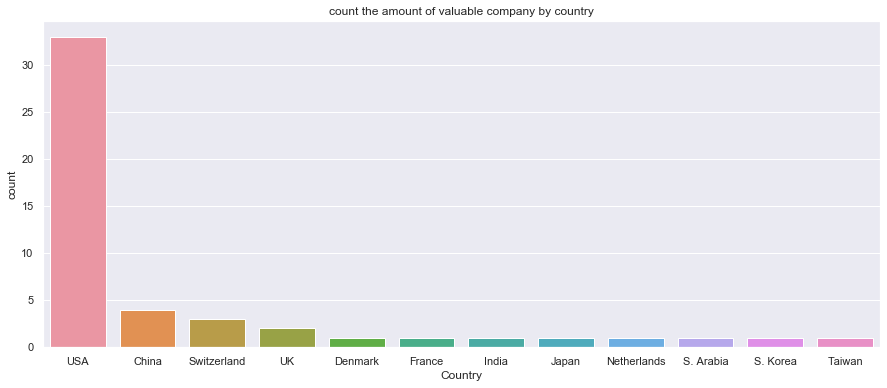

In [92]:
#by_country_i = by_country.reset_index()
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(15,6)})
ax = sns.barplot(x= by_country.index, y='count', data=by_country)

ax.set_title('count the amount of valuable company by country')

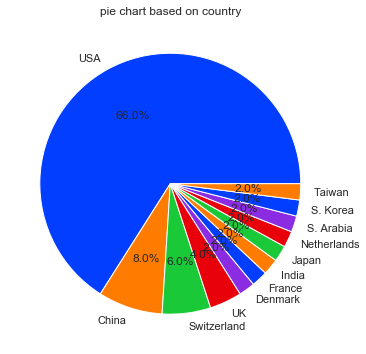

In [88]:
data = by_country_i['count']
labels = by_country_i['Country']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('pie chart based on country')
plt.show()

### arabia surpass china come to the second place based on  Market Cap

### taiwan come to the fifth place with a single company

Text(0.5, 1.0, 'count the amount of valuable company by country')

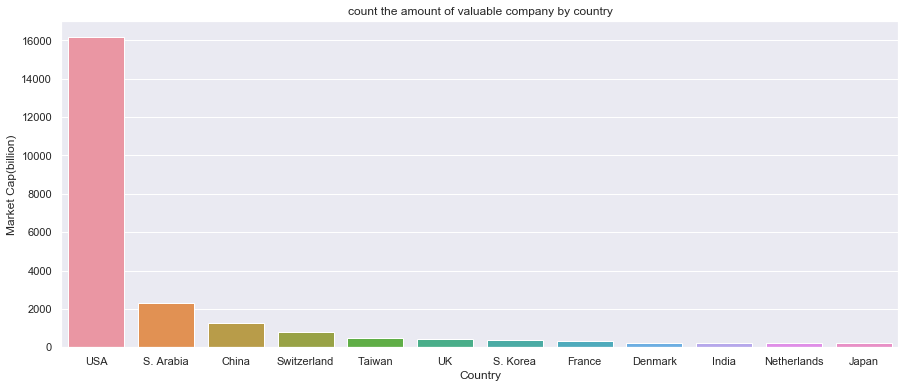

In [94]:
sns.set(rc={'figure.figsize':(15,6)})
ax = sns.barplot(x= df_market_sum.index, y='Market Cap(billion)', data=df_market_sum)
ax.set_title('count the amount of valuable company by country')

### Whether measured by comapny numbers or market cap, the United States commands more than 60% of the chart, which show the dominant place in the world

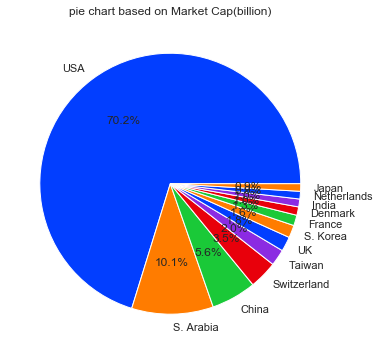

In [89]:

data = df_market_sum['Market Cap(billion)']
labels = df_market_sum.index

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('pie chart based on Market Cap(billion)')
plt.show()
